<h1 align="center"><font size = 8>Machine Learning | 2024 </font></h1>
<br>
<h2 align="center"><font size = 6  color="darkblue"> Data Cleaning </font></h2>
<h3 align="center">Abdulrahman Nourzad</h3>
<h4 align="center">Master's in Computer Software Engineering & Post DBA in Business Intelligence</h4>
<br>
<br>
<hr>
<br>
<br>

<h2 align="left"> Project 5: Data Cleaning on COVID-19 dataset</h2>

# 1. Introduction

#### What is data cleaning?

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.

# 📤 2. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 💾 3. Read Data

In [2]:
data_covid = pd.read_csv("COVID-19.csv")

# 🔎 4. Check & Overview the basic information of the dataset

In [3]:
data_covid.head()

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,Canada,3/2/07,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,USA,3/22/07,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,Austria,4/6/07,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,Pakistan,4/14/07,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,germany,4/15/07,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [4]:
row = data_covid.shape[0]
column = data_covid.shape[1]
results = pd.DataFrame([[row], [column]], columns=['Shape of data'], index=['Rows', 'Columns'])
results

,Shape of data
Rows,295
Columns,18


In [5]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     295 non-null    object 
 1   date        295 non-null    object 
 2   SESSO       295 non-null    object 
 3   AGE         295 non-null    int64  
 4   WBC         293 non-null    float64
 5   Piastrine   293 non-null    float64
 6   Neutrofili  222 non-null    float64
 7   Linfociti   222 non-null    object 
 8   Monociti    222 non-null    float64
 9   Eosinofili  222 non-null    float64
 10  Basofili    220 non-null    float64
 11  PCR         286 non-null    float64
 12  AST         292 non-null    float64
 13  ALT         279 non-null    float64
 14  ALP         139 non-null    float64
 15  GGT         144 non-null    float64
 16  LDH         205 non-null    float64
 17  TARGET      295 non-null    int64  
dtypes: float64(12), int64(2), object(4)
memory usage: 41.6+ KB


In [6]:
data_covid['TARGET'].unique()

array([2, 1, 0], dtype=int64)

# 5. Inconsistent Data Entry

### 🟣 Check & Convert data type

In [7]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     295 non-null    object 
 1   date        295 non-null    object 
 2   SESSO       295 non-null    object 
 3   AGE         295 non-null    int64  
 4   WBC         293 non-null    float64
 5   Piastrine   293 non-null    float64
 6   Neutrofili  222 non-null    float64
 7   Linfociti   222 non-null    object 
 8   Monociti    222 non-null    float64
 9   Eosinofili  222 non-null    float64
 10  Basofili    220 non-null    float64
 11  PCR         286 non-null    float64
 12  AST         292 non-null    float64
 13  ALT         279 non-null    float64
 14  ALP         139 non-null    float64
 15  GGT         144 non-null    float64
 16  LDH         205 non-null    float64
 17  TARGET      295 non-null    int64  
dtypes: float64(12), int64(2), object(4)
memory usage: 41.6+ KB


**Result & Decide :**

- **Row  Column      Data type        result         Decide to convert data type**     
-   0   Country     object             OK                     category
-   1   date        object             OK                         -
-   2   SESSO       object             OK                     category (better: int)
-   3   AGE         int64              OK                         -
-   4   WBC         float64            OK                         -
-   5   Piastrine   float64            OK                         -
-   6   Neutrofili  float64            OK                         -
-   7   Linfociti   object           Not OK                     float
-   8   Monociti    float64            OK                         -
-   9   Eosinofili  float64            OK                         -
-   10  Basofili    float64            OK                         -
-   11  PCR         float64            OK                         -
-   12  AST         float64            OK                         -
-   13  ALT         float64            OK                         -
-   14  ALP         float64            OK                         -
-   15  GGT         float64            OK                         -
-   16  LDH         float64            OK                         -
-   17  TARGET      int64              OK                         -

**Country**

In [8]:
data_covid['Country']

0           Canada
1              USA
2          Austria
3         Pakistan
4          germany
          ...     
290       Pakistan
291            USA
292    South Korea
293       Pakistan
294       pakistan
Name: Country, Length: 295, dtype: object

In [9]:
data_covid['Country'] = data_covid['Country'].astype('category')

In [10]:
data_covid['Country']

0           Canada
1              USA
2          Austria
3         Pakistan
4          germany
          ...     
290       Pakistan
291            USA
292    South Korea
293       Pakistan
294       pakistan
Name: Country, Length: 295, dtype: category
Categories (30, object): [' Germany', ' New Zealand', ' Sweden', ' USA', ..., 'UK', 'USA', 'germany', 'pakistan']

**SESSO**

In [11]:
data_covid['SESSO']  #SESSO means Gender (Male and Female)

0      M
1      M
2      M
3      M
4      M
      ..
290    M
291    M
292    M
293    M
294    M
Name: SESSO, Length: 295, dtype: object

In [12]:
data_covid['SESSO'] = data_covid['SESSO'].astype('category')

In [13]:
data_covid['SESSO']

0      M
1      M
2      M
3      M
4      M
      ..
290    M
291    M
292    M
293    M
294    M
Name: SESSO, Length: 295, dtype: category
Categories (2, object): ['F', 'M']

In [14]:
# Convert values of SESSO Column
data_covid_New = pd.DataFrame()
data_covid_New = data_covid.copy()
data_covid_New['SESSO'] = np.where(data_covid['SESSO'] == 'M', 1, 0)
data_covid_New['SESSO']

0      1
1      1
2      1
3      1
4      1
      ..
290    1
291    1
292    1
293    1
294    1
Name: SESSO, Length: 295, dtype: int32

**Linfociti**

In [15]:
data_covid_New['Linfociti']

0      0.8
1      0.9
2      NaN
3      1.2
4      NaN
      ... 
290    0.4
291    1.3
292    0.6
293    0.8
294    0.6
Name: Linfociti, Length: 295, dtype: object

In [16]:
#data_covid_New['Linfociti'] = data_covid_New['Linfociti'].astype('float')
#print error ----->>> ValueError: could not convert string to float: '0-4'

In [17]:
data_covid_New['Linfociti'].unique()  # for controlling error in any value

array(['0.8', '0.9', nan, '1.2', '0.4', '1.3', '0.6', '0.5', '1', '2.3',
       '2.7', '0.7', '0.3', '0.2', '1.4', '1.1', '0-4', '1.5', '1.6',
       '1.7', '2.4', '1.9', '2.2', '2', '2.9', '7.2', '3.3', '3.6', '1.8',
       '4.1', '2.1', '3.1', '2.5', '3', '2.6'], dtype=object)

In [18]:
index = data_covid_New[data_covid_New['Linfociti'] =='0-4'].index
data_covid_New['Linfociti'][index] = 0.4

In [19]:
data_covid_New['Linfociti'] = data_covid_New['Linfociti'].astype('float')

In [20]:
data_covid_New.info() #Review results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Country     295 non-null    category
 1   date        295 non-null    object  
 2   SESSO       295 non-null    int32   
 3   AGE         295 non-null    int64   
 4   WBC         293 non-null    float64 
 5   Piastrine   293 non-null    float64 
 6   Neutrofili  222 non-null    float64 
 7   Linfociti   222 non-null    float64 
 8   Monociti    222 non-null    float64 
 9   Eosinofili  222 non-null    float64 
 10  Basofili    220 non-null    float64 
 11  PCR         286 non-null    float64 
 12  AST         292 non-null    float64 
 13  ALT         279 non-null    float64 
 14  ALP         139 non-null    float64 
 15  GGT         144 non-null    float64 
 16  LDH         205 non-null    float64 
 17  TARGET      295 non-null    int64   
dtypes: category(1), float64(13), int32(1), int64(2), o

# 6. Handling Duplicates

### 🟣 Show duplicates

In [21]:
data_covid_New.duplicated().sum()

16

### 🟣 Drop duplicates

In [22]:
data_covid_New.drop_duplicates(inplace=True)

In [23]:
data_covid_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 278
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Country     279 non-null    category
 1   date        279 non-null    object  
 2   SESSO       279 non-null    int32   
 3   AGE         279 non-null    int64   
 4   WBC         277 non-null    float64 
 5   Piastrine   277 non-null    float64 
 6   Neutrofili  209 non-null    float64 
 7   Linfociti   209 non-null    float64 
 8   Monociti    209 non-null    float64 
 9   Eosinofili  209 non-null    float64 
 10  Basofili    208 non-null    float64 
 11  PCR         273 non-null    float64 
 12  AST         277 non-null    float64 
 13  ALT         266 non-null    float64 
 14  ALP         131 non-null    float64 
 15  GGT         136 non-null    float64 
 16  LDH         194 non-null    float64 
 17  TARGET      279 non-null    int64   
dtypes: category(1), float64(13), int32(1), int64(2), o

# 7. Handling Outliers

### 🟣 BoxPlot

<a><img src="box-plot.png" alt="poxblot" border="0"></a>

<a><img src="box-plot-construction.png" alt="poxblot" border="0"></a>


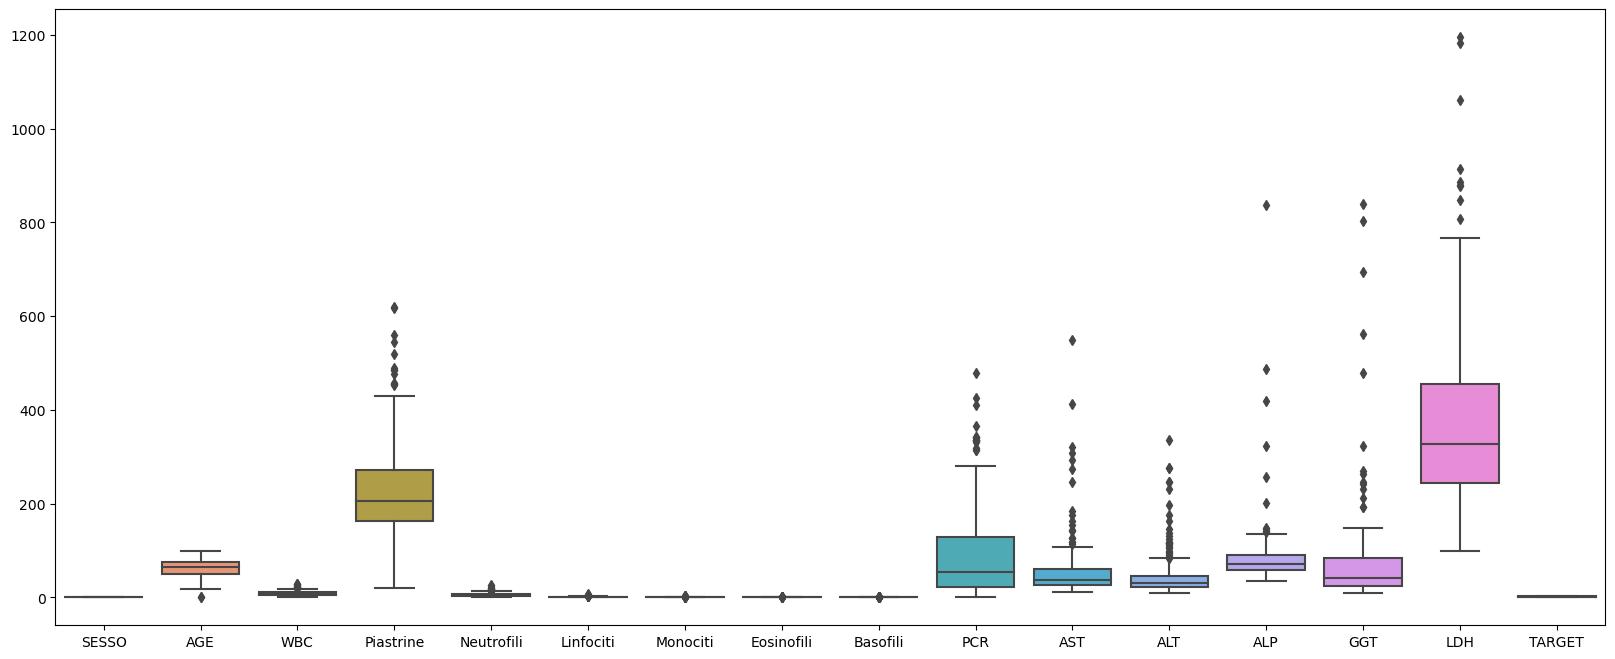

In [24]:
fig = plt.figure(figsize=(20, 8))
sns.boxplot(data=data_covid_New)
plt.show()

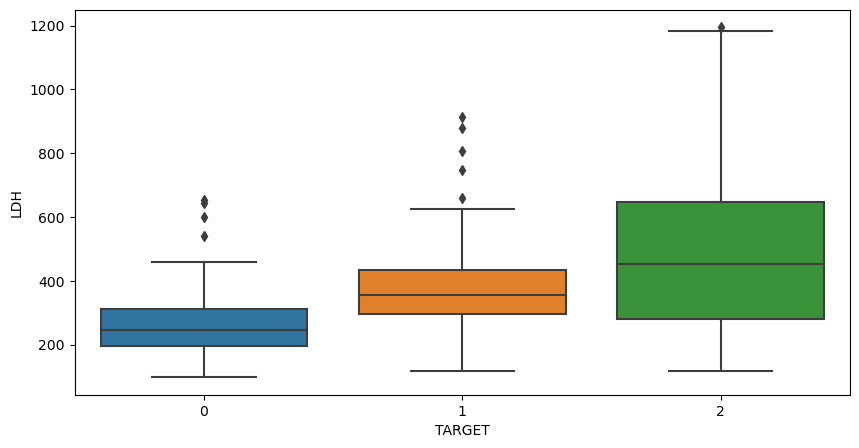

In [25]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=data_covid_New, x='TARGET', y='LDH')
plt.show()

### 🟣 **Remove the outliers**

#### A: OUTLIERS Detection Function

In [26]:
def outliers(df, Target, feature, T):
    q1 = df[df[Target]==T][feature].quantile(0.25)
    q3 = df[df[Target]==T][feature].quantile(0.75)
    iqr = q3 - q1
    ub = (q3+(1.5*iqr))
    lb = (q1-(1.5*iqr))
    return ub, lb

In [27]:
def Upperb_Lowerb(df, Target, feature):
    ubs=[]
    lbs=[]
    for T in range(len(df[Target].unique())):
        ub , lb = outliers(df, Target, feature, T)
        ubs.append(ub)
        lbs.append(lb)
    return ubs, lbs

In [28]:
def boxplot(df, Target, feature):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_axes([0,0,1,1])
    sns.boxplot(ax=ax, data=df, x=Target, y=feature)
    yu, yl = Upperb_Lowerb(df, Target, feature)
    
    ax.axhline(y=yu[0], color='b')
    ax.axhline(y=yu[1], color = 'orange')
    ax.axhline(y=yu[2], color='g')
    
    ax.axhline(y=yl[0], color='blue')
    ax.axhline(y=yl[1], color = 'orange')
    ax.axhline(y=yl[2], color='green')

**Draw boxplot before dropping outliers!**

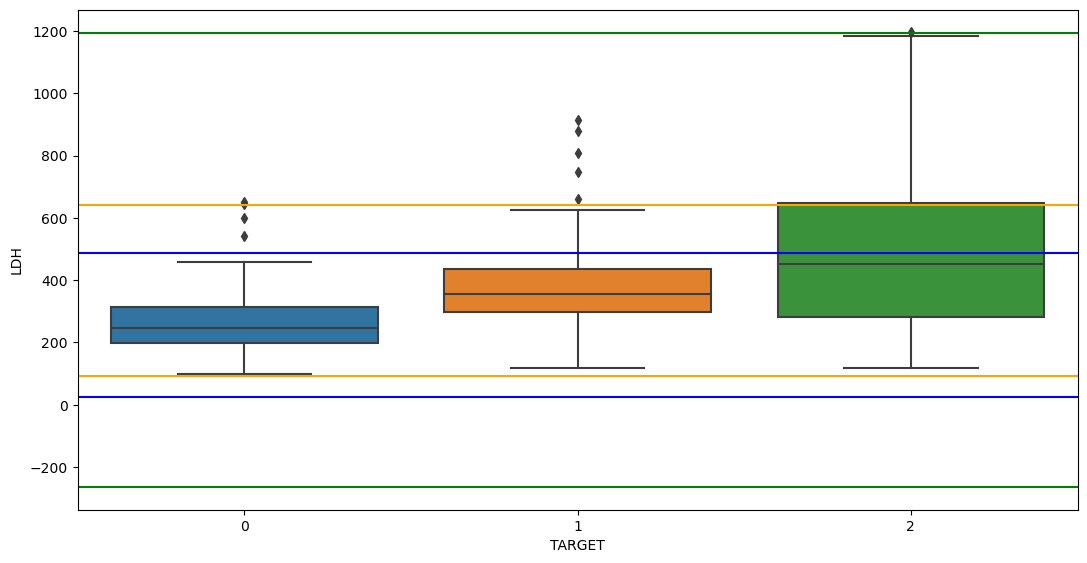

In [29]:
boxplot(data_covid_New, "TARGET", "LDH")

#### B: OUTLIERS Remove Function

In [30]:
def drop_outliers(df, Target, feature):
    ubs=[]
    lbs=[]
    ubs, lbs = Upperb_Lowerb(df, Target, feature)
    for T in range(len(df[Target].unique())):
        df = df.drop(index= df[df[Target]==T][feature][df[feature]>ubs[T]].index, axis=0)
        df = df.drop(index= df[df[Target]==T][feature][df[feature]<lbs[T]].index, axis=0)
    return df

## LDH

In [31]:
df = drop_outliers(data_covid_New, "TARGET", "LDH")

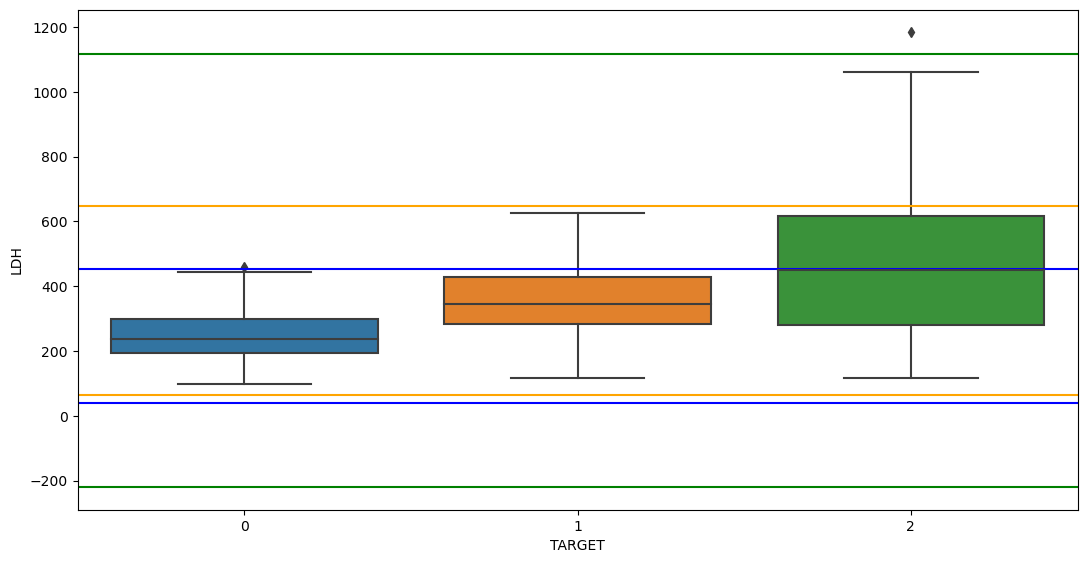

In [32]:
# Show boxplot after dropping outliers. It's not necessary!. Only for checking removed outliers.
boxplot(df, "TARGET", "LDH")

## PCR

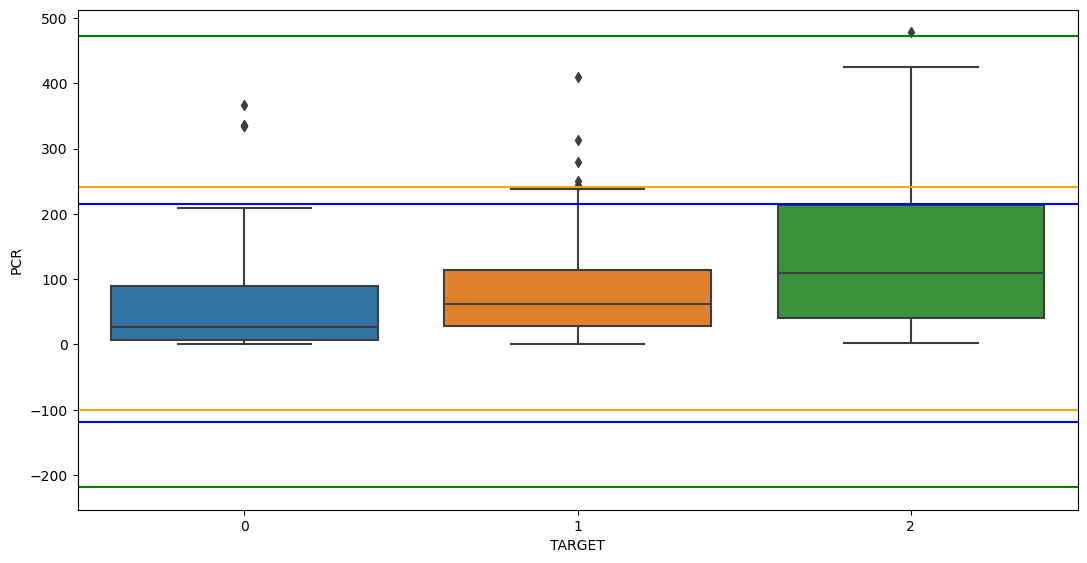

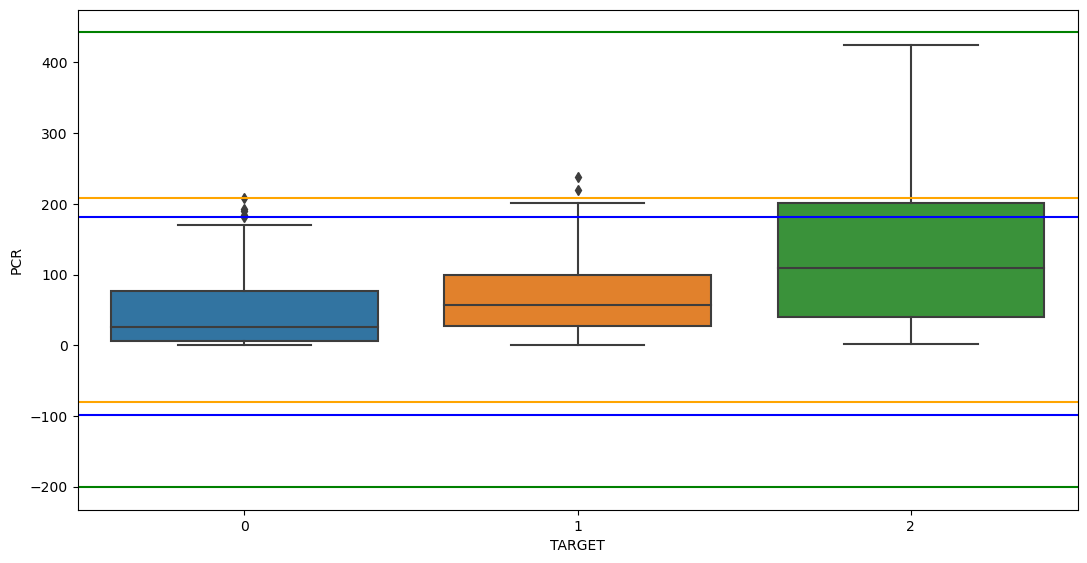

In [33]:
boxplot(df, "TARGET", "PCR")
df = drop_outliers(df, "TARGET", "PCR")
boxplot(df, "TARGET", "PCR")

## AST

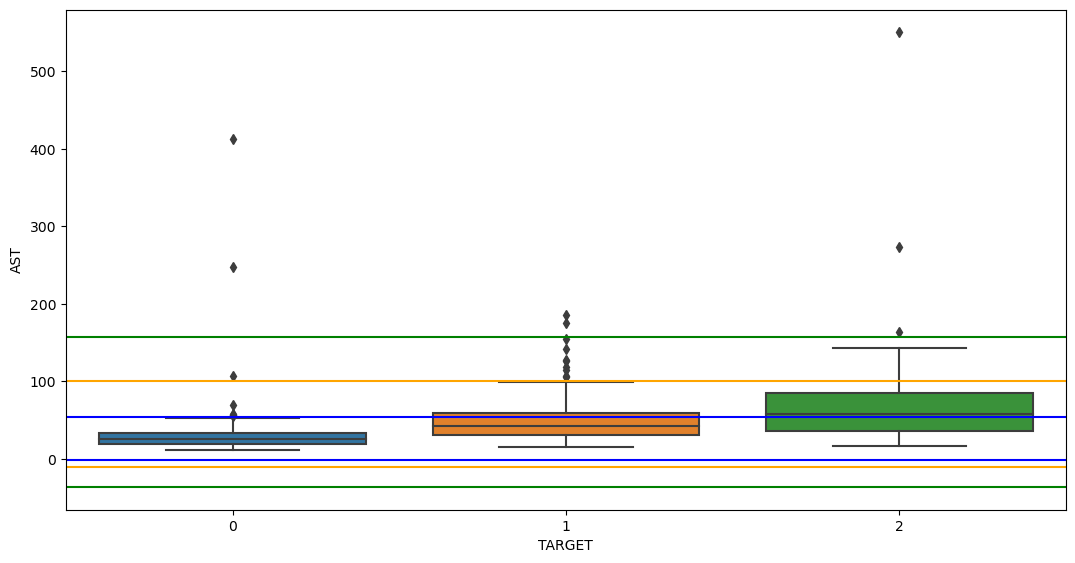

In [34]:
boxplot(df, "TARGET", "AST")
df = drop_outliers(df, "TARGET", "AST")

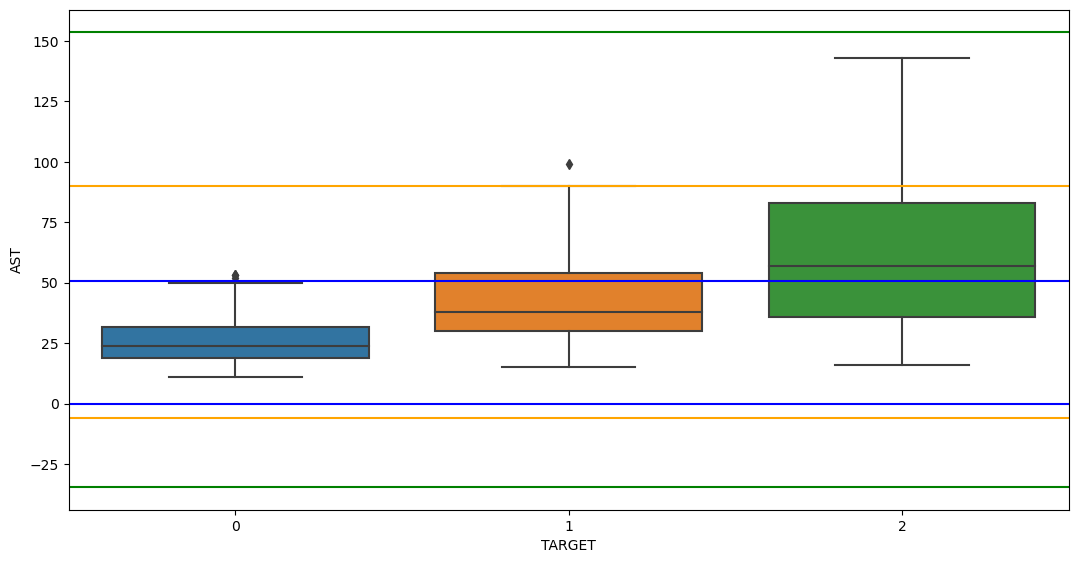

In [35]:
boxplot(df, "TARGET", "AST")

## ALT

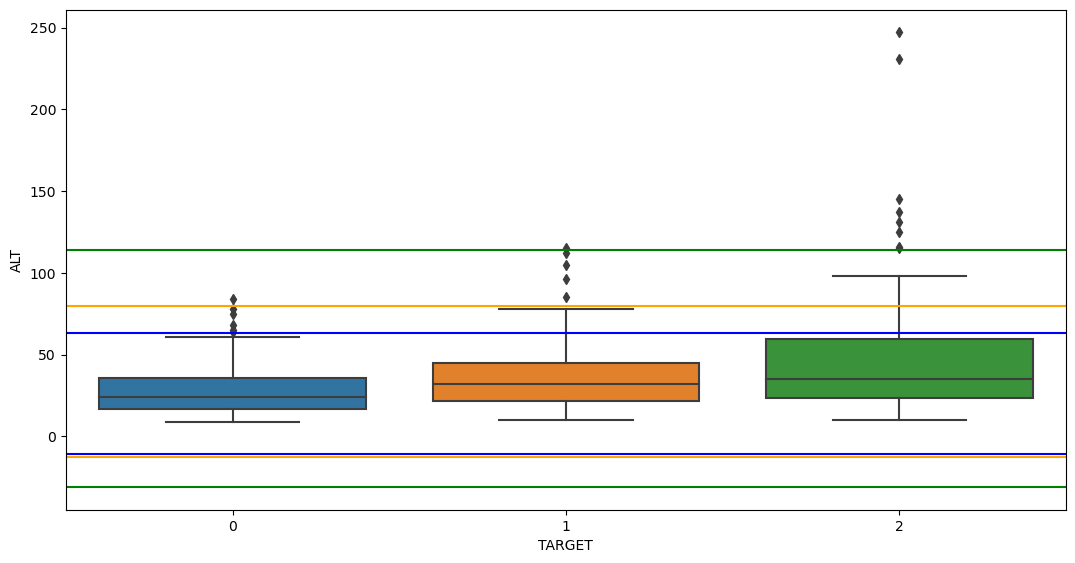

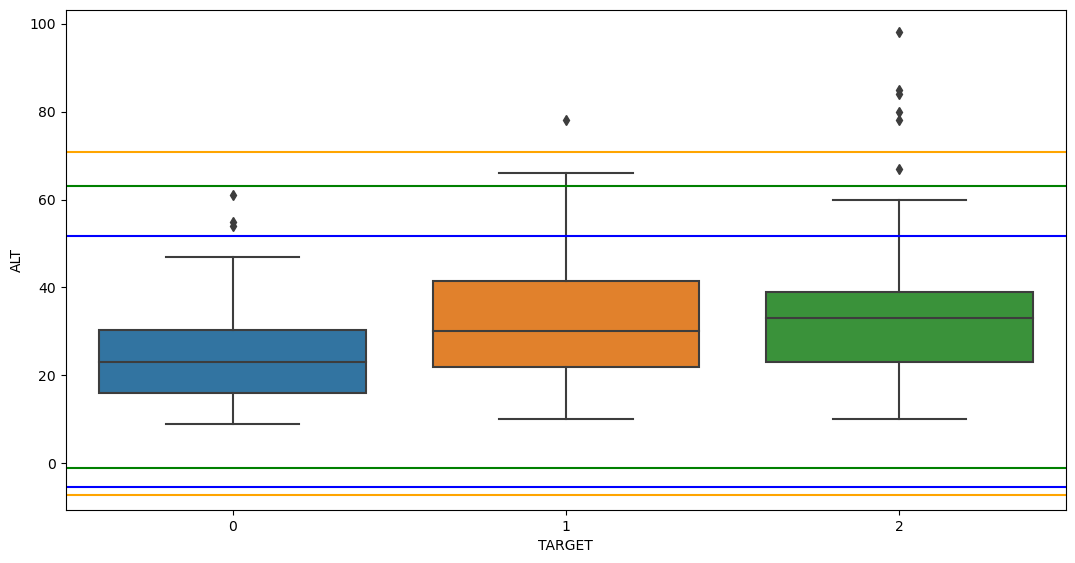

In [36]:
boxplot(df, "TARGET", "ALT")
df = drop_outliers(df, "TARGET", "ALT")
boxplot(df, "TARGET", "ALT")

## Linfociti

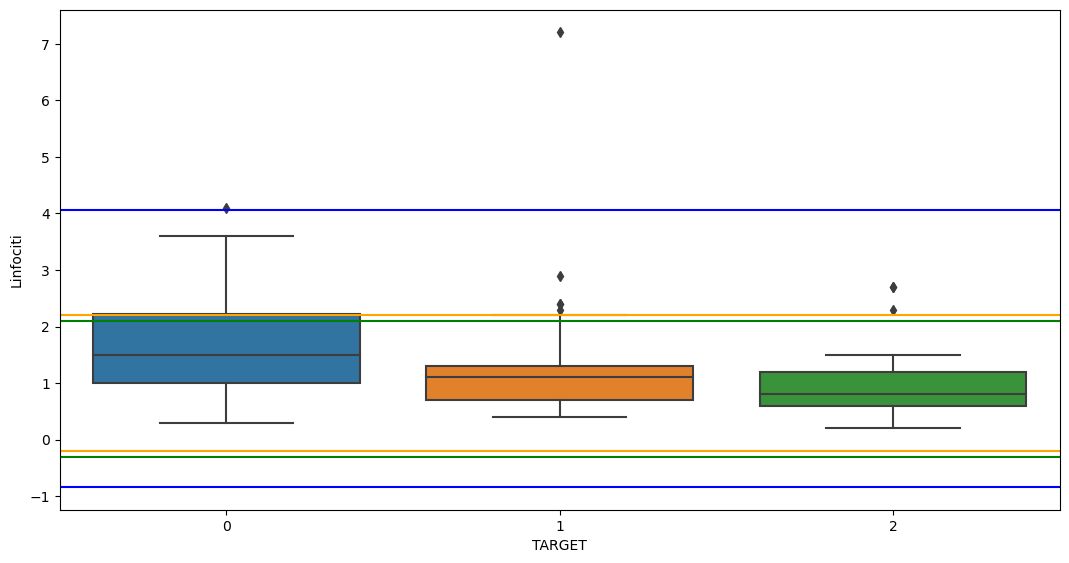

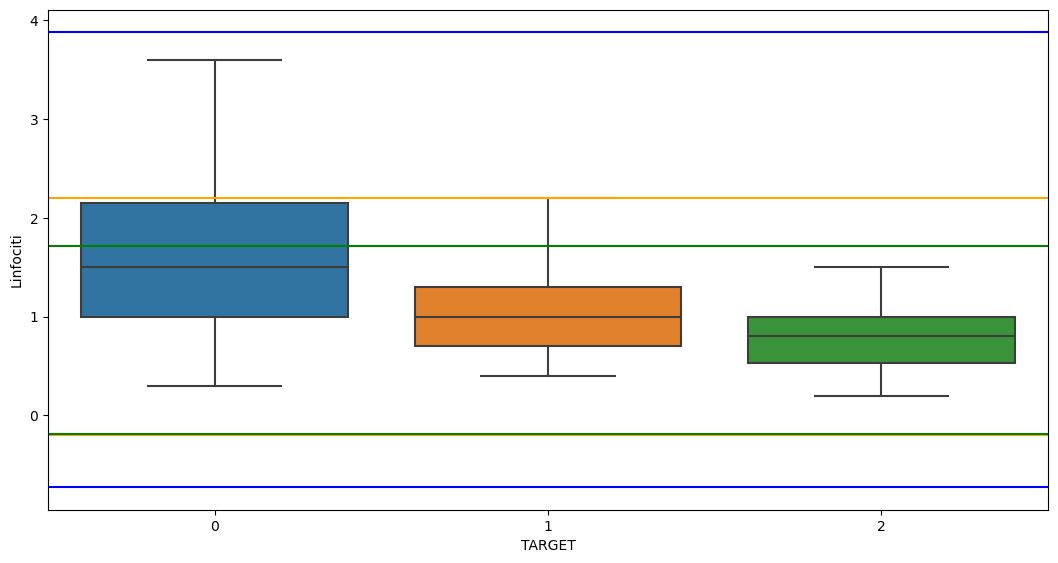

In [37]:
boxplot(df, "TARGET", "Linfociti")
df = drop_outliers(df, "TARGET", "Linfociti")
boxplot(df, "TARGET", "Linfociti")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 278
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Country     210 non-null    category
 1   date        210 non-null    object  
 2   SESSO       210 non-null    int32   
 3   AGE         210 non-null    int64   
 4   WBC         208 non-null    float64 
 5   Piastrine   208 non-null    float64 
 6   Neutrofili  151 non-null    float64 
 7   Linfociti   151 non-null    float64 
 8   Monociti    151 non-null    float64 
 9   Eosinofili  152 non-null    float64 
 10  Basofili    151 non-null    float64 
 11  PCR         204 non-null    float64 
 12  AST         208 non-null    float64 
 13  ALT         201 non-null    float64 
 14  ALP         95 non-null     float64 
 15  GGT         100 non-null    float64 
 16  LDH         142 non-null    float64 
 17  TARGET      210 non-null    int64   
dtypes: category(1), float64(13), int32(1), int64(2), o

In [39]:
df = drop_outliers(df, "TARGET", "WBC")
df = drop_outliers(df, "TARGET", "Piastrine")
df = drop_outliers(df, "TARGET", "Neutrofili")
df = drop_outliers(df, "TARGET", "Monociti")
df = drop_outliers(df, "TARGET", "Eosinofili")
df = drop_outliers(df, "TARGET", "Basofili")
df = drop_outliers(df, "TARGET", "ALP")
df = drop_outliers(df, "TARGET", "GGT")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 276
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Country     154 non-null    category
 1   date        154 non-null    object  
 2   SESSO       154 non-null    int32   
 3   AGE         154 non-null    int64   
 4   WBC         152 non-null    float64 
 5   Piastrine   152 non-null    float64 
 6   Neutrofili  101 non-null    float64 
 7   Linfociti   101 non-null    float64 
 8   Monociti    101 non-null    float64 
 9   Eosinofili  102 non-null    float64 
 10  Basofili    102 non-null    float64 
 11  PCR         149 non-null    float64 
 12  AST         152 non-null    float64 
 13  ALT         149 non-null    float64 
 14  ALP         63 non-null     float64 
 15  GGT         72 non-null     float64 
 16  LDH         100 non-null    float64 
 17  TARGET      154 non-null    int64   
dtypes: category(1), float64(13), int32(1), int64(2), o

In [41]:
df.corr()[['TARGET']].sort_values('TARGET', ascending=False)

,TARGET
TARGET,1.000000
AST,0.548472
LDH,0.501984
PCR,0.474596
ALT,0.311857
SESSO,0.309376
GGT,0.286582
Neutrofili,0.216322
AGE,0.137151
ALP,0.038359


# 8. Handling Missing Values (Fill/Keep/Drop?)

In [42]:
df.head()

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,Canada,3/2/07,1,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,USA,3/22/07,1,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,Austria,4/6/07,1,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,Pakistan,4/14/07,1,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,germany,4/15/07,1,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


### A. How Much Data is Missing?

In [43]:
df.isnull().sum()

Country        0
date           0
SESSO          0
AGE            0
WBC            2
Piastrine      2
Neutrofili    53
Linfociti     53
Monociti      53
Eosinofili    52
Basofili      52
PCR            5
AST            2
ALT            5
ALP           91
GGT           82
LDH           54
TARGET         0
dtype: int64

### Make a Function to calculate the percent of missing data in each columns (features) and then sort it

In [44]:
def missing_percentage(df):
    nan_per = 100*(df.isnull().sum()/len(df))
    nan_per = nan_per[nan_per>0].sort_values()
    return nan_per

In [45]:
nan_per = missing_percentage(df)
nan_per

WBC            1.298701
Piastrine      1.298701
AST            1.298701
PCR            3.246753
ALT            3.246753
Eosinofili    33.766234
Basofili      33.766234
Neutrofili    34.415584
Linfociti     34.415584
Monociti      34.415584
LDH           35.064935
GGT           53.246753
ALP           59.090909
dtype: float64

### Plot the feature with missing indicating the percent of missing data:

In [46]:
#Function for drawing barplot
def plot(df):
    nan_per = missing_percentage(df)
    plt.figure(figsize=(14, 5))
    sns.barplot(x=nan_per.index, y=nan_per)

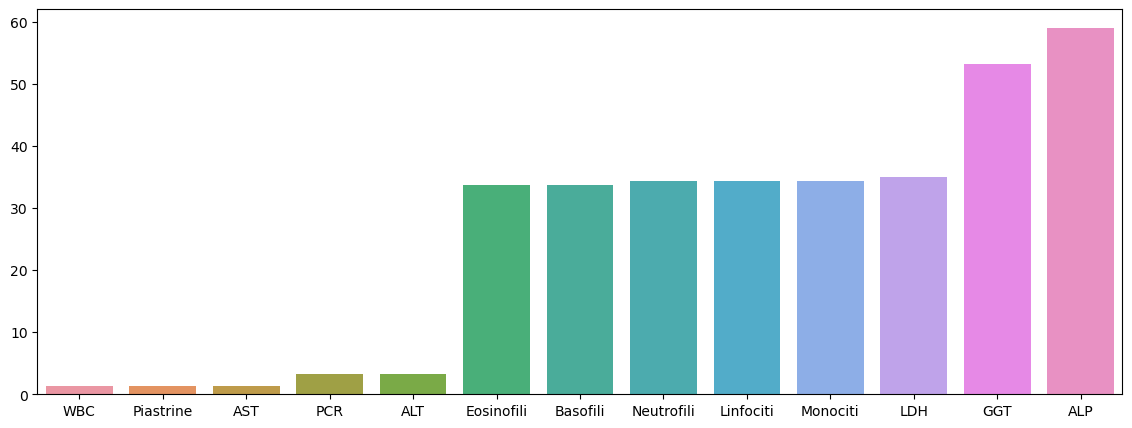

In [47]:
plot(df)

## B. Working base on Rows Missing Data

**If only a few rows are missing some values, then it might just be a good idea to drop those rows.** 

**What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.**

**Every Feature with missing data must be checked!**

**We choose a threshold of 1%. It means, if there is less than 1% of a feature are missing,then we will consider just dropping that rows**

### Dropping Rows with less than 1% missing values:

In [48]:
nan_per[nan_per<1]

Series([], dtype: float64)

**Result:**

**No column includes this condition!
If the columns have that condition, use the code below to drop the rows:**
#### df= df.dropna(axis=0, subset=['column1', 'column2'])

## C. Working based on Columns Missing Data

## filling the Columns with less than 10% missing values using mean values

In [49]:
nan_per = missing_percentage(df)
nan_per[nan_per<10]

WBC          1.298701
Piastrine    1.298701
AST          1.298701
PCR          3.246753
ALT          3.246753
dtype: float64

In [50]:
df['WBC'] = df['WBC'].fillna(df['WBC'].mean())

In [51]:
df['Piastrine'] = df['Piastrine'].fillna(df['Piastrine'].mean())

In [52]:
df['AST'] = df['AST'].fillna(df['AST'].mean())

In [53]:
df['PCR'] = df['PCR'].fillna(df['PCR'].mean())

In [54]:
df['ALT'] = df['ALT'].fillna(df['ALT'].mean())

In [55]:
missing_percentage(df)

Eosinofili    33.766234
Basofili      33.766234
Neutrofili    34.415584
Linfociti     34.415584
Monociti      34.415584
LDH           35.064935
GGT           53.246753
ALP           59.090909
dtype: float64

## Remove the Columns with more than 50% missing values

### GGT

In [56]:
df = df.drop('GGT', axis=1)

### ALP

In [57]:
df = df.drop('ALP', axis=1)

In [58]:
missing_percentage(df)

Eosinofili    33.766234
Basofili      33.766234
Neutrofili    34.415584
Linfociti     34.415584
Monociti      34.415584
LDH           35.064935
dtype: float64

### PLOT

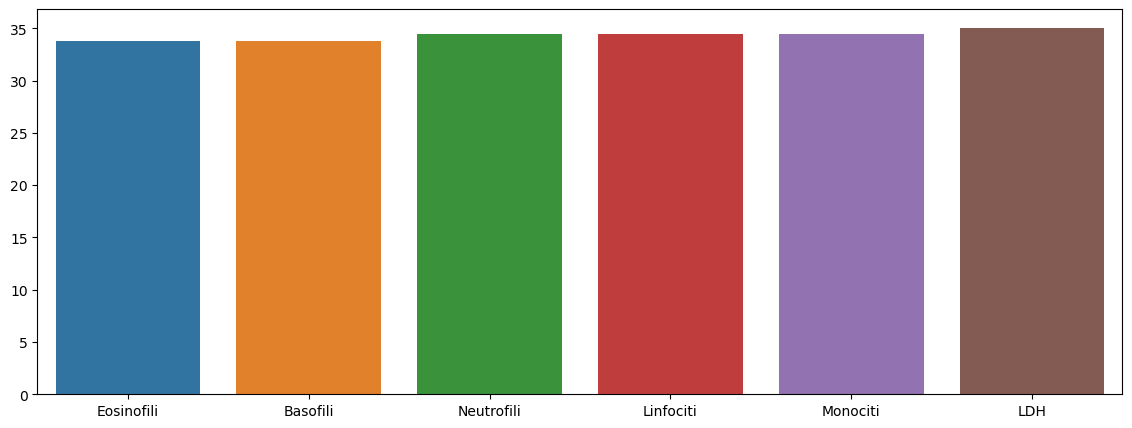

In [59]:
plot(df)

## D. Imputation of Missing Data

## What are the Stages of Life?

- Infant = 0-1 year.
- Toddler = 2-4 yrs.
- Child = 5-12 yrs.
- Teen = 13-19 yrs.
- Adult = 20-39 yrs.
- Middle Age Adult = 40-59 yrs.
- Senior Adult = 60+

In [60]:
np.sort(df['AGE'].unique())

array([ 0, 18, 23, 28, 29, 30, 32, 34, 36, 37, 38, 39, 40, 41, 44, 45, 46,
       47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85,
       87, 89, 91, 93, 94, 95], dtype=int64)

In [61]:
def ageGroup(age):  
    if(age>=0 and age<=19):
        return 'Teen'
    elif(age>19 and age<=39):
        return 'Adult'
    elif(age>39 and age<=59):
        return 'Middle Age Adult'
    elif(age>=60):
        return 'Senior Adult'

In [62]:
df['AgeGroups'] = df['AGE'].apply(ageGroup)

In [63]:
df['AgeGroups']

0      Middle Age Adult
1      Middle Age Adult
2          Senior Adult
3          Senior Adult
4          Senior Adult
             ...       
271               Adult
272        Senior Adult
273               Adult
274    Middle Age Adult
276    Middle Age Adult
Name: AgeGroups, Length: 154, dtype: object

In [64]:
df

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,LDH,TARGET,AgeGroups
0,Canada,3/2/07,1,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.000000,36.000000,18.000000,257.0,2,Middle Age Adult
1,USA,3/22/07,1,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.500000,25.000000,14.000000,207.0,2,Middle Age Adult
2,Austria,4/6/07,1,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.700000,31.000000,22.000000,NaN,2,Senior Adult
3,Pakistan,4/14/07,1,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.700000,96.000000,33.000000,651.0,2,Senior Adult
4,germany,4/15/07,1,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,76.043624,39.078947,30.845638,NaN,2,Senior Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,USA,3/13/10,0,36,13.5,184.0,9.5,2.6,1.4,0.1,0.0,1.300000,17.000000,11.000000,NaN,0,Adult
272,China,3/13/10,1,80,3.4,134.0,2.8,0.3,0.3,0.0,0.0,117.100000,53.000000,28.000000,NaN,0,Senior Adult
273,Pakistan,3/13/10,0,30,6.8,362.0,4.5,1.9,0.4,0.0,0.0,28.100000,24.000000,12.000000,357.0,0,Adult
274,Pakistan,3/14/10,0,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.700000,22.000000,29.000000,NaN,0,Middle Age Adult


### Eosinofili

In [65]:
df['Eosinofili'] = df.groupby('AgeGroups')['Eosinofili'].transform(lambda x: x.fillna(x.mean()))

In [66]:
missing_percentage(df)

Basofili      33.766234
Neutrofili    34.415584
Linfociti     34.415584
Monociti      34.415584
LDH           35.064935
dtype: float64

### Neutrofili

In [67]:
df['Neutrofili'] = df['Neutrofili'].fillna(df['Neutrofili'].mean())
missing_percentage(df)

Basofili     33.766234
Linfociti    34.415584
Monociti     34.415584
LDH          35.064935
dtype: float64

### Linfociti

In [68]:
male = df[df['SESSO']== 1]

female = df[df['SESSO']== 0]

In [69]:
male['Linfociti'] = male.groupby(by='AgeGroups')['Linfociti'].transform(lambda x: x.fillna(x.mean()))

In [70]:
female['Linfociti'] = female.groupby(by='AgeGroups')['Linfociti'].transform(lambda x: x.fillna(x.mean()))

In [71]:
df = pd.concat([male, female], axis=0)

In [72]:
missing_percentage(df)

Linfociti     0.649351
Basofili     33.766234
Monociti     34.415584
LDH          35.064935
dtype: float64

In [73]:
df[df['Linfociti'].isnull()==True]

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,LDH,TARGET,AgeGroups
202,Italy,7/31/09,0,18,9.2,311.0,4.828713,NaN,NaN,0.0,NaN,0.1,24.0,27.0,142.0,0,Teen


In [74]:
df['Linfociti'] = df['Linfociti'].fillna(df['Linfociti'].mean())

In [75]:
df[df.index == 202]

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,LDH,TARGET,AgeGroups
202,Italy,7/31/09,0,18,9.2,311.0,4.828713,1.031738,NaN,0.0,NaN,0.1,24.0,27.0,142.0,0,Teen


In [76]:
missing_percentage(df)

Basofili    33.766234
Monociti    34.415584
LDH         35.064935
dtype: float64

### Monociti

In [77]:
df['Monociti'] = df['Monociti'].fillna(df['Monociti'].mean())

In [78]:
missing_percentage(df)

Basofili    33.766234
LDH         35.064935
dtype: float64

### Basofili

In [79]:
df['Basofili'] = df['Basofili'].fillna(df['Basofili'].mean())

In [80]:
missing_percentage(df)

LDH    35.064935
dtype: float64

### LDH

In [81]:
df['LDH'] = df.groupby(by='AgeGroups')['LDH'].transform(lambda x: x.fillna(x.mean()))

# 9. Now, we don't have any Missing Data

In [82]:
missing_percentage(df)

Series([], dtype: float64)

In [83]:
df

,Country,date,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,LDH,TARGET,AgeGroups
0,Canada,3/2/07,1,56,2.9,128.0,1.900000,0.800000,0.200000,0.000000,0.0,29.000000,36.000000,18.000000,257.000000,2,Middle Age Adult
1,USA,3/22/07,1,56,3.5,151.0,2.100000,0.900000,0.400000,0.000000,0.0,16.500000,25.000000,14.000000,207.000000,2,Middle Age Adult
2,Austria,4/6/07,1,72,4.6,206.0,4.828713,0.794444,0.492079,0.013208,0.0,193.700000,31.000000,22.000000,400.700000,2,Senior Adult
3,Pakistan,4/14/07,1,72,16.5,316.0,14.000000,1.200000,0.300000,0.000000,0.0,318.700000,96.000000,33.000000,651.000000,2,Senior Adult
4,germany,4/15/07,1,77,4.9,198.0,4.828713,0.794444,0.492079,0.013208,0.0,76.043624,39.078947,30.845638,400.700000,2,Senior Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,China,3/11/10,0,32,10.7,370.0,4.828713,1.737500,0.492079,0.036364,0.0,13.200000,21.000000,13.000000,283.833333,0,Adult
271,USA,3/13/10,0,36,13.5,184.0,9.500000,2.600000,1.400000,0.100000,0.0,1.300000,17.000000,11.000000,283.833333,0,Adult
273,Pakistan,3/13/10,0,30,6.8,362.0,4.500000,1.900000,0.400000,0.000000,0.0,28.100000,24.000000,12.000000,357.000000,0,Adult
274,Pakistan,3/14/10,0,40,5.6,270.0,4.828713,1.100000,0.492079,0.005405,0.0,16.700000,22.000000,29.000000,318.583333,0,Middle Age Adult


# 10.Save Dataset

In [84]:
#save

df.to_csv('COVID19_new.csv')

## Done!

**Nourzad**
